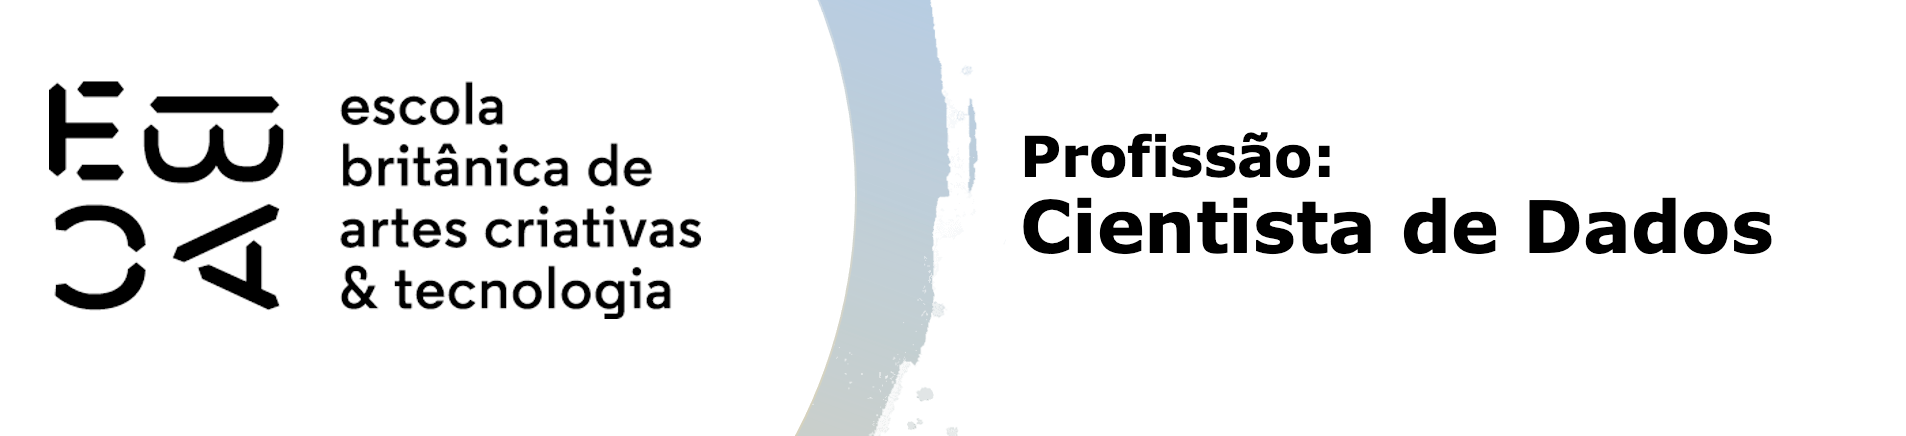

# Tarefa - Agrupamento hierárquico

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo agora é agrupar as sessões de acesso ao portal considerando o comportamento de acesso e informações da data, como a proximidade a uma data especial, fim de semana e o mês.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('/home/diego/Downloads/hierarquicos/online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [6]:
df.describe(include=['object', 'bool']).T

,count,unique,top,freq
Month,12330,10,May,3364
VisitorType,12330,3,Returning_Visitor,10551
Weekend,12330,2,False,9462
Revenue,12330,2,False,10422


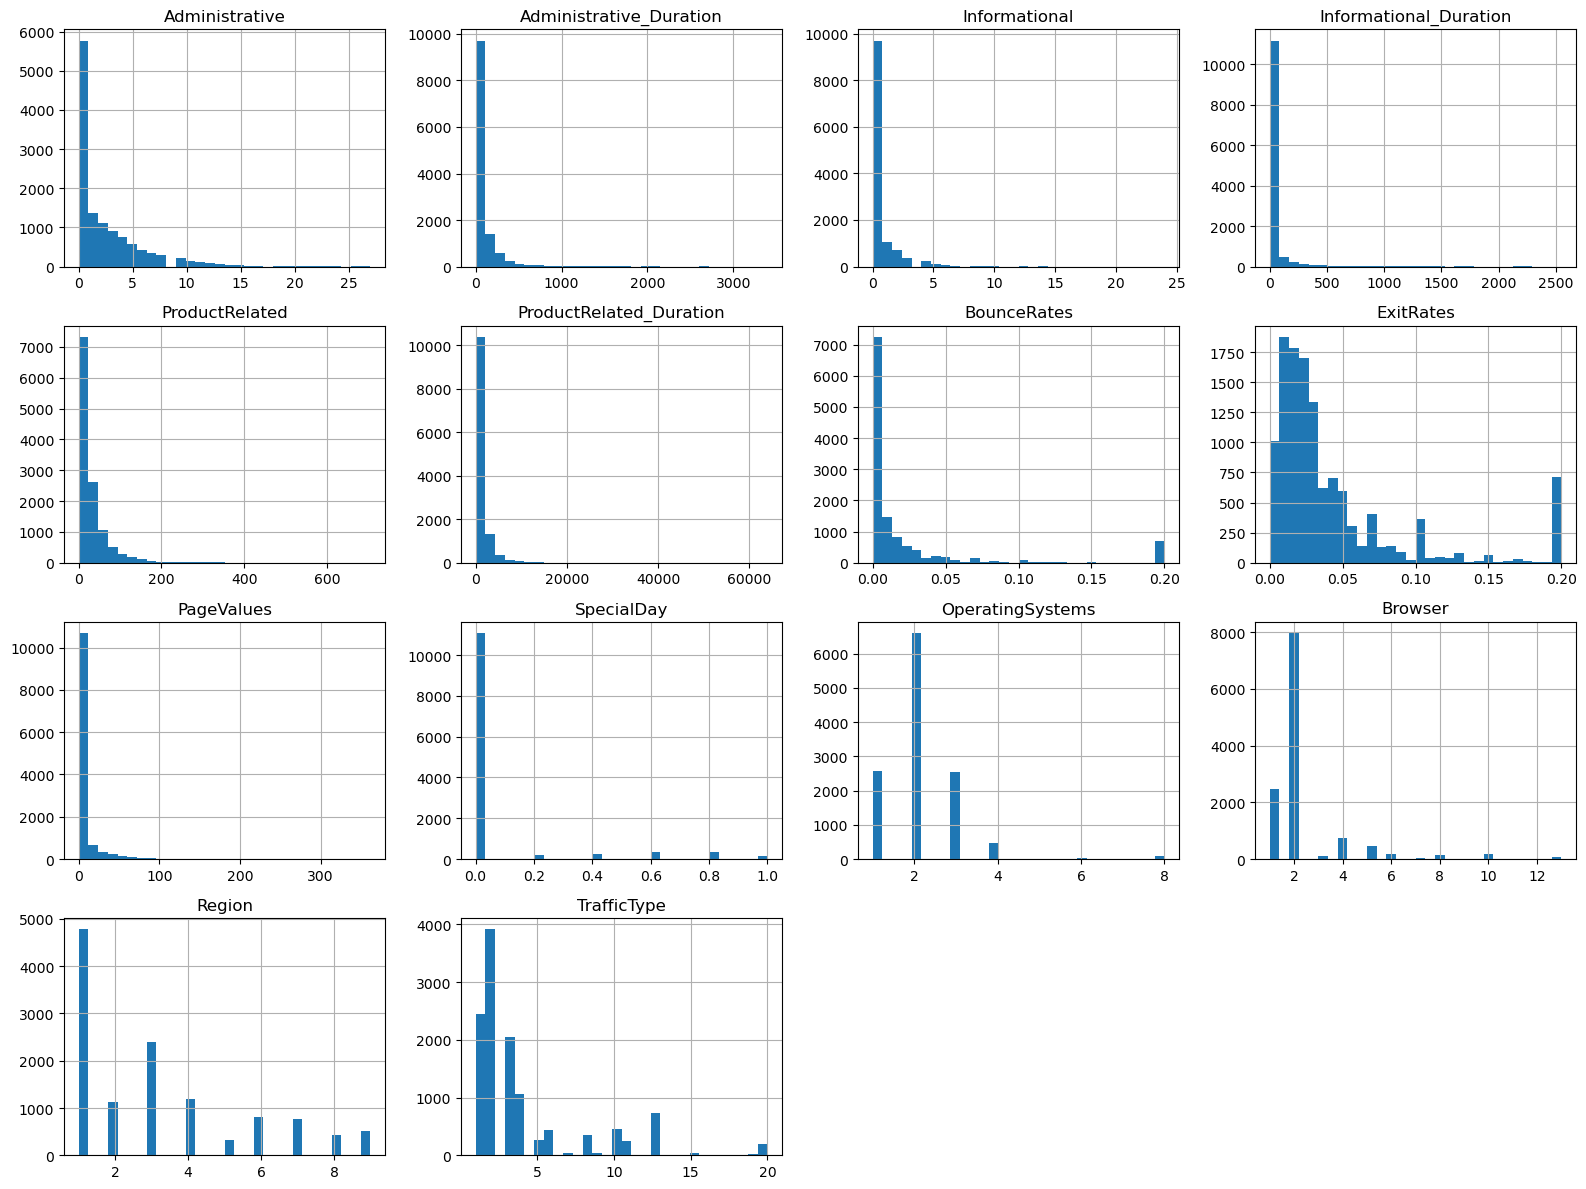

In [7]:
# Visualizando a distribuição das variáveis numéricas com histogramas
df.hist(figsize=(16, 12), bins=30)
plt.tight_layout()
plt.show()

In [8]:
# Verificando valores missing no DataFrame
faltantes = df.isnull().sum()
print(faltantes)

# Remove valores missing se tiver
if faltantes.any():
    df = df.dropna()
    print("Linhas com valores missing foram removidas.")
else:
    print("Não há valores missing no DataFrame.")

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64
Não há valores missing no DataFrame.


In [9]:
# Converter variáveis booleanas para inteiros 
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)

In [10]:
# Padronizar os nomes das categorias em 'VisitorType'
df['VisitorType'] = df['VisitorType'].replace({'Other': 'New_Visitor'})

In [11]:
# Converter 'Month' para categoria ordenada
mes_ordenado = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['Month'] = pd.Categorical(df['Month'], categories=mes_ordenado, ordered=True)

## Variáveis de agrupamento

Liste as variáveis que você vai querer utilizar. Essa é uma atividade importante do projeto, e tipicamente não a recebemos pronta. Não há resposta pronta ou correta, mas apenas critérios e a sua decisão. Os critérios são os seguintes:

- Selecione para o agrupamento variáveis que descrevam o padrão de navegação na sessão.
- Selecione variáveis que indiquem a característica da data.
- Não se esqueça de que você vai precisar realizar um tratamento especial para variáveis qualitativas.
- Trate adequadamente valores faltantes.

In [12]:
# Variáveis que descrevem o padrão de navegação na sessão:
navegacao_vars = [
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration'
]

# Variáveis que indicam características da data:
data_vars = [
    'Month',        # qualitativa, precisa de tratamento (ex: one-hot ou ordinal)
    'SpecialDay',   # quantitativa
    'Weekend'       # já convertida para int
]

# Lista final das variáveis 
agrupamento_vars = navegacao_vars + data_vars

print("Variáveis selecionadas para o agrupamento:", agrupamento_vars)

Variáveis selecionadas para o agrupamento: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'Month', 'SpecialDay', 'Weekend']


In [13]:
# Verificando novamente valores faltantes nas variáveis selecionadas para agrupamento
faltantes_agrupamento = df[agrupamento_vars].isnull().sum()
print(faltantes_agrupamento)

# Remove faltante se tiver
if faltantes_agrupamento.any():
    df = df.dropna(subset=agrupamento_vars)
    print("Linhas com valores faltantes nas variáveis de agrupamento foram removidas.")
else:
    print("Não há valores faltantes nas variáveis de agrupamento.")

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
Month                      0
SpecialDay                 0
Weekend                    0
dtype: int64
Não há valores faltantes nas variáveis de agrupamento.


## Número de grupos

Nesta atividade vamos adotar uma abordagem bem pragmática e avaliar agrupamentos hierárquicos com 3 e 4 grupos, por estarem bem alinhados com uma expectativa e estratégia do diretor da empresa. 

*Atenção*: Cuidado se quiser fazer o dendrograma, pois com muitas observações ele pode ser mais complicado de fazer, e dependendo de como for o comando, ele pode travar o *kernell* do seu python.

In [14]:
# Separar variáveis numéricas e categóricas
num_vars = [v for v in agrupamento_vars if df[v].dtype in [np.float64, np.int64]]
cat_vars = [v for v in agrupamento_vars if df[v].dtype.name == 'category' or df[v].dtype == object]

In [15]:
# Pipeline de pré-processamento
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_vars),
    ('cat', OneHotEncoder(drop='first'), cat_vars)
])

X = preprocessor.fit_transform(df[agrupamento_vars])

In [16]:
Z = linkage(X, method='ward')

In [17]:
# Gerar rótulos para 3 e 4 grupos
labels_3 = fcluster(Z, 3, criterion='maxclust')
labels_4 = fcluster(Z, 4, criterion='maxclust')

In [18]:
# Avaliaçãao com silhouette score
score_3 = silhouette_score(X, labels_3)
score_4 = silhouette_score(X, labels_4)

print(f"Silhouette score para 3 grupos: {score_3:.3f}")
print(f"Silhouette score para 4 grupos: {score_4:.3f}")

Silhouette score para 3 grupos: 0.336
Silhouette score para 4 grupos: 0.310


In [19]:
# Adiciona os rótulos
df['cluster_3'] = labels_3
df['cluster_4'] = labels_4

In [20]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,cluster_3,cluster_4
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,0,0,3,4
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,0,0,3,4
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,0,0,3,4
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,0,0,3,4
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,1,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,1,0,3,3
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,1,0,3,3
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,1,0,3,3
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,0,0,3,4


## Avaliação dos grupos

Construa os agrupamentos com a técnica adequada que vimos em aula. Não se esqueça de tratar variáveis qualitativas, padronizar escalas das quantitativas, tratar valores faltantes e utilizar a distância correta.

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [21]:
# Exclui 'Month' das variáveis numéricas para agregação
agrupamento_vars_numericas = [v for v in agrupamento_vars if v != 'Month']

In [22]:
# Para 3 grupos
print("Análise descritiva para 3 grupos:")
display(df.groupby('cluster_3')[agrupamento_vars_numericas].mean())
display(df.groupby('cluster_3')[agrupamento_vars_numericas].median())
display(df['cluster_3'].value_counts().sort_index())

Análise descritiva para 3 grupos:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,SpecialDay,Weekend
cluster_3,,,,,,,,
1,6.400733,286.801506,2.589493,218.482062,91.576054,3652.313135,0.006597,0.161881
2,1.088777,32.652550,0.228643,11.198576,25.473199,864.741764,0.620603,0.134003
3,1.765238,51.375119,0.178650,5.686749,22.204864,812.704771,0.000590,0.257185


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,SpecialDay,Weekend
cluster_3,,,,,,,,
1,6.0,169.35,2.0,101.0,68.0,2611.651923,0.0,0.0
2,0.0,0.00,0.0,0.0,15.0,436.000000,0.6,0.0
3,0.0,0.00,0.0,0.0,15.0,488.716667,0.0,0.0


cluster_3
1    1637
2    1194
3    9499
Name: count, dtype: int64

In [23]:
# Para 4 grupos
print("\nAnálise descritiva para 4 grupos:")
display(df.groupby('cluster_4')[agrupamento_vars_numericas].mean())
display(df.groupby('cluster_4')[agrupamento_vars_numericas].median())
display(df['cluster_4'].value_counts().sort_index())


Análise descritiva para 4 grupos:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,SpecialDay,Weekend
cluster_4,,,,,,,,
1,6.400733,286.801506,2.589493,218.482062,91.576054,3652.313135,0.006597,0.161881
2,1.088777,32.652550,0.228643,11.198576,25.473199,864.741764,0.620603,0.134003
3,2.071633,63.089547,0.302497,10.807552,25.467049,920.766607,0.000000,1.000000
4,1.659155,47.319231,0.135771,3.913773,21.075397,775.290505,0.000794,0.000000


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,SpecialDay,Weekend
cluster_4,,,,,,,,
1,6.0,169.35,2.0,101.0,68.0,2611.651923,0.0,0.0
2,0.0,0.00,0.0,0.0,15.0,436.000000,0.6,0.0
3,1.0,11.00,0.0,0.0,17.0,572.600000,0.0,1.0
4,0.0,0.00,0.0,0.0,14.0,465.458333,0.0,0.0


cluster_4
1    1637
2    1194
3    2443
4    7056
Name: count, dtype: int64

In [24]:
# Sugestão de nomes
def sugerir_nomes_grupos(df, cluster_col, agrupamento_vars_numericas):
    resumo = df.groupby(cluster_col)[agrupamento_vars_numericas].mean()
    nomes = {}
    for idx, row in resumo.iterrows():
        if row['ProductRelated'] > 20 and row['SpecialDay'] > 0.1:
            nome = 'Visitantes de Datas Especiais'
        elif row['ProductRelated'] > 20:
            nome = 'Visitantes Altamente Engajados'
        elif row['ProductRelated'] < 5 and row['SpecialDay'] < 0.05:
            nome = 'Visitantes de Baixo Engajamento'
        else:
            nome = 'Visitantes Moderados'
        nomes[idx] = nome
    return nomes

nomes_3 = sugerir_nomes_grupos(df, 'cluster_3', agrupamento_vars_numericas)
nomes_4 = sugerir_nomes_grupos(df, 'cluster_4', agrupamento_vars_numericas)

print("Sugestão de nomes para 3 grupos:", nomes_3)
print("Sugestão de nomes para 4 grupos:", nomes_4)

Sugestão de nomes para 3 grupos: {1: 'Visitantes Altamente Engajados', 2: 'Visitantes de Datas Especiais', 3: 'Visitantes Altamente Engajados'}
Sugestão de nomes para 4 grupos: {1: 'Visitantes Altamente Engajados', 2: 'Visitantes de Datas Especiais', 3: 'Visitantes Altamente Engajados', 4: 'Visitantes Altamente Engajados'}


## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [25]:
# Para 3 grupos
print("Avaliação dos grupos (3 clusters):")
display(df.groupby('cluster_3')[['BounceRates', 'Revenue']].agg(['mean', 'median', 'count']))
print("Proporção de compradores por grupo (3 clusters):")
display(df.groupby('cluster_3')['Revenue'].mean())

Avaliação dos grupos (3 clusters):


BounceRates                   Revenue             
                 mean    median count      mean median count
cluster_3                                                   
1            0.006723  0.003947  1637  0.285889    0.0  1637
2            0.035108  0.012500  1194  0.058626    0.0  1194
3            0.023234  0.000000  9499  0.144226    0.0  9499

Proporção de compradores por grupo (3 clusters):


cluster_3
1    0.285889
2    0.058626
3    0.144226
Name: Revenue, dtype: float64

In [26]:
# Para 4 grupos
print("\nAvaliação dos grupos (4 clusters):")
display(df.groupby('cluster_4')[['BounceRates', 'Revenue']].agg(['mean', 'median', 'count']))
print("Proporção de compradores por grupo (4 clusters):")
display(df.groupby('cluster_4')['Revenue'].mean())


Avaliação dos grupos (4 clusters):


BounceRates                   Revenue             
                 mean    median count      mean median count
cluster_4                                                   
1            0.006723  0.003947  1637  0.285889    0.0  1637
2            0.035108  0.012500  1194  0.058626    0.0  1194
3            0.018623  0.000000  2443  0.171920    0.0  2443
4            0.024830  0.000241  7056  0.134637    0.0  7056

Proporção de compradores por grupo (4 clusters):


cluster_4
1    0.285889
2    0.058626
3    0.171920
4    0.134637
Name: Revenue, dtype: float64

In [27]:
grupo_mais_propenso_3 = df.groupby('cluster_3')['Revenue'].mean().idxmax()

In [28]:
print(f"\nNo agrupamento com 3 grupos, o grupo {grupo_mais_propenso_3} possui clientes mais propensos à compra.")


No agrupamento com 3 grupos, o grupo 1 possui clientes mais propensos à compra.


In [29]:
grupo_mais_propenso_4 = df.groupby('cluster_4')['Revenue'].mean().idxmax()

In [30]:
print(f"No agrupamento com 4 grupos, o grupo {grupo_mais_propenso_4} possui clientes mais propensos à compra.")

No agrupamento com 4 grupos, o grupo 1 possui clientes mais propensos à compra.
